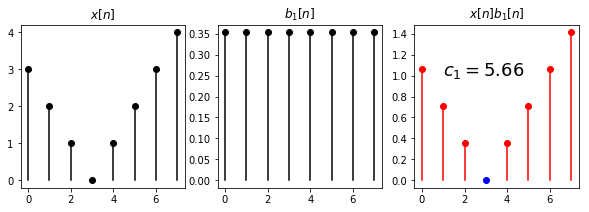

In [98]:
# podobnost, korelace, prumet do bazi a laska ke komplexni exponenciale. 
import numpy as np
import matplotlib.pyplot as plt

# malovani kladnych vzorku cervene a zapornych modre ... 
def red_blue_discrete(n,x,fig):
    ii = np.argwhere(x > 0.0)
    fig.stem(n[ii],x[ii],basefmt=" ",linefmt='r',markerfmt='ro') 
    ii = np.argwhere(x <= 0.0)
    fig.stem(n[ii],x[ii],basefmt=" ",linefmt='b',markerfmt='bo') 
    
    
# --------- podobnost 8-rozmernych vektoru ------------ 
n = np.arange(0,8)
x = np.array([3, 2, 1, 0, 1, 2, 3, 4])
b1 = np.ones(n.shape) * np.sqrt(1/8); 
c1 = np.dot(b1,x)
b2 = 1/2 * np.cos (2*np.pi*1/8 * n)
c2 = np.dot(b2,x)
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].stem(n,x,basefmt=" ",linefmt='k',markerfmt='ko')  # nechci cervenou baseline ...
ax[0].set_title('$x[n]$')
ax[1].stem(n,b1,basefmt=" ",linefmt='k',markerfmt='ko')  # nechci cervenou baseline ...
ax[1].set_title('$b_1[n]$')
red_blue_discrete(n, b1 * x,ax[2])
ax[2].set_title('$x[n] b_1[n]$')
ax[2].text(1,1,"$c_1 =${:.2f}".format(c1),fontsize = 18)
plt.savefig('FIG/base8_1.pdf')

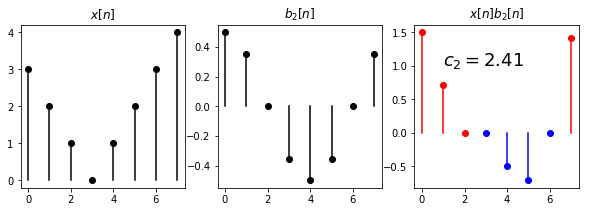

In [99]:
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].stem(n,x,basefmt=" ",linefmt='k',markerfmt='ko')  # nechci cervenou baseline ...
ax[0].set_title('$x[n]$')
ax[1].stem(n,b2,basefmt=" ",linefmt='k',markerfmt='ko')  # nechci cervenou baseline ...
ax[1].set_title('$b_2[n]$')
red_blue_discrete(n, b2 * x,ax[2])
ax[2].set_title('$x[n] b_2[n]$')
ax[2].text(1,1,"$c_2 =${:.2f}".format(c2),fontsize = 18)
plt.savefig('FIG/base8_2.pdf')

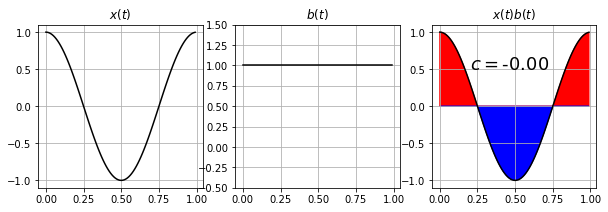

In [103]:
# malovani kladneho signalu cervene a zapornych modre ... 
def red_blue_continuous(t,x,fig):
    # pro jistotu musime na zacatek i na konec signalu vrazit nulu ... 
    tpad = np.pad(t, (1,1), 'constant', constant_values=(0,np.max(t)))     
    xpad = np.pad(x, (1,1), 'constant', constant_values=(0,0))     
    ii = np.argwhere(xpad < 0.0)
    xpad[ii] = 0
    fig.fill(tpad,xpad,color='r') 

    xpad = np.pad(x, (1,1), 'constant', constant_values=(0,0))     
    ii = np.argwhere(xpad > 0.0)
    xpad[ii] = 0
    fig.fill(tpad,xpad,color='b') 
    fig.plot(t,x,color='k') 

# --------------- cosinusovka a ss. signal -----------------
t = np.arange(0,1,0.01)
x = np.cos(2*np.pi*t); 
b = np.ones(t.shape)
c = np.dot(b,x) * 0.01
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].plot(t,x,color='k') 
ax[0].set_title('$x(t)$')
ax[0].grid()
ax[1].plot(t,b,color='k') 
ax[1].set_title('$b(t)$')
ax[1].set_ylim(-0.5,1.5)
ax[1].grid()
red_blue_continuous(t, b * x,ax[2])
ax[2].set_title('$x(t) b(t)$')
ax[2].text(0.2,0.5,"$c =${:.2f}".format(c),fontsize = 18)
ax[2].grid()
plt.savefig('FIG/cos_ss.pdf')

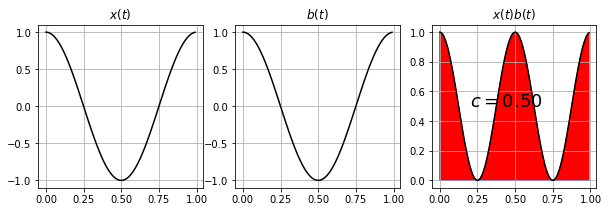

In [104]:
# --------------- cosinusovka a cpsinusovka -----------------
t = np.arange(0,1,0.01)
x = np.cos(2*np.pi*t); 
b = x
c = np.dot(b,x) * 0.01
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].plot(t,x,color='k') 
ax[0].set_title('$x(t)$')
ax[0].grid()
ax[1].plot(t,b,color='k') 
ax[1].set_title('$b(t)$')
ax[1].grid()
red_blue_continuous(t, b * x,ax[2])
ax[2].set_title('$x(t) b(t)$')
ax[2].text(0.2,0.5,"$c =${:.2f}".format(c),fontsize = 18)
ax[2].grid()
plt.savefig('FIG/cos_cos.pdf')

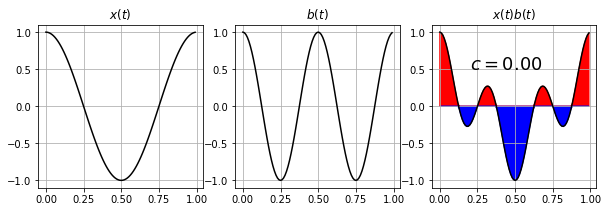

In [106]:
# --------------- cosinusovka a 2x rychlejsi cosinusovka -----------------
t = np.arange(0,1,0.01)
x = np.cos(2*np.pi*t); 
b = np.cos(4*np.pi*t); 
c = np.dot(b,x)* 0.01
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].plot(t,x,color='k') 
ax[0].set_title('$x(t)$')
ax[0].grid()
ax[1].plot(t,b,color='k') 
ax[1].set_title('$b(t)$')
ax[1].grid()
red_blue_continuous(t, b * x,ax[2])
ax[2].set_title('$x(t) b(t)$')
ax[2].text(0.2,0.5,"$c =${:.2f}".format(c),fontsize = 18)
ax[2].grid()
plt.savefig('FIG/cos_cos2.pdf')

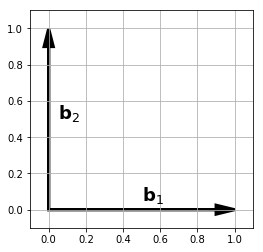

In [120]:
# dobre baze 
fig = plt.figure(figsize=(4,4))
fig.gca().set_ylim(-0.1,1.1)
fig.gca().set_xlim(-0.1,1.1)
fig.gca().arrow(0, 0, 1,0, head_width=0.05, head_length=0.1, linewidth = 3, length_includes_head=True, fc='k', ec='k')
fig.gca().arrow(0, 0, 0,1, head_width=0.05, head_length=0.1, linewidth = 3, length_includes_head=True, fc='k', ec='k')
fig.gca().text(0.5,0.05,"$\mathbf{b}_1$",fontsize = 18)
fig.gca().text(0.05,0.5,"$\mathbf{b}_2$",fontsize = 18)
fig.gca().grid()
plt.savefig('FIG/dobre_baze.pdf')

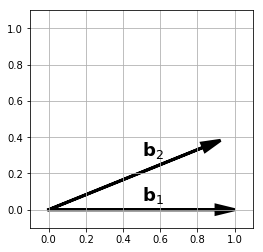

In [126]:
# spatne baze 1
fig = plt.figure(figsize=(4,4))
fig.gca().set_ylim(-0.1,1.1)
fig.gca().set_xlim(-0.1,1.1)
x = np.real(np.exp(1j * np.pi / 8))
y = np.imag(np.exp(1j * np.pi / 8))
fig.gca().arrow(0, 0, 1,0, head_width=0.05, head_length=0.1, linewidth = 3, length_includes_head=True, fc='k', ec='k')
fig.gca().arrow(0, 0, x,y, head_width=0.05, head_length=0.1, linewidth = 3, length_includes_head=True, fc='k', ec='k')
fig.gca().text(0.5,0.05,"$\mathbf{b}_1$",fontsize = 18)
fig.gca().text(0.5,0.3,"$\mathbf{b}_2$",fontsize = 18)
fig.gca().grid()
plt.savefig('FIG/blbe_baze_1.pdf')

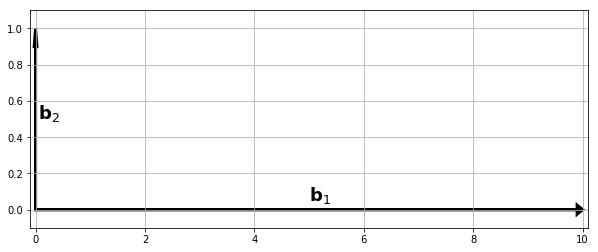

In [128]:
# spatne baze 2
fig = plt.figure(figsize=(10,4))
fig.gca().set_ylim(-0.1,1.1)
fig.gca().set_xlim(-0.1,10.1)
x = np.real(np.exp(1j * np.pi / 8))
y = np.imag(np.exp(1j * np.pi / 8))
fig.gca().arrow(0, 0, 10,0, head_width=0.05, head_length=0.1, linewidth = 3, length_includes_head=True, fc='k', ec='k')
fig.gca().arrow(0, 0, 0,1, head_width=0.05, head_length=0.1, linewidth = 3, length_includes_head=True, fc='k', ec='k')
fig.gca().text(5,0.05,"$\mathbf{b}_1$",fontsize = 18)
fig.gca().text(0.05,0.5,"$\mathbf{b}_2$",fontsize = 18)
fig.gca().grid()
plt.savefig('FIG/blbe_baze_2.pdf')

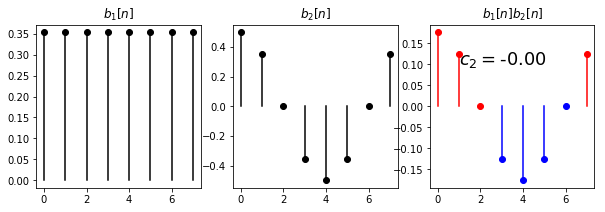

In [133]:
# ortogonalita 8-d bazi
n = np.arange(0,8)
x = np.array([3, 2, 1, 0, 1, 2, 3, 4])
b1 = np.ones(n.shape) * np.sqrt(1/8); 
c1 = np.dot(b1,x)
b2 = 1/2 * np.cos (2*np.pi*1/8 * n)
c = np.dot(b1,b2)
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].stem(n,b1,basefmt=" ",linefmt='k',markerfmt='ko')  # nechci cervenou baseline ...
ax[0].set_title('$b_1[n]$')
ax[1].stem(n,b2,basefmt=" ",linefmt='k',markerfmt='ko')  # nechci cervenou baseline ...
ax[1].set_title('$b_2[n]$')
red_blue_discrete(n, b1 * b2,ax[2])
ax[2].set_title('$b_1[n] b_2[n]$')
ax[2].text(1,0.1,"$c_2 =${:.2f}".format(c),fontsize = 18)
plt.savefig('FIG/base8_ortog.pdf')

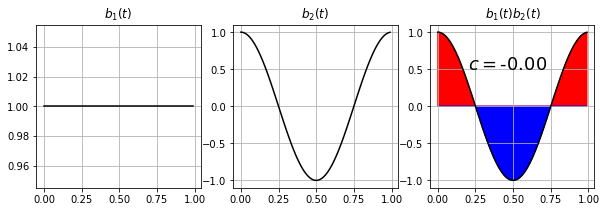

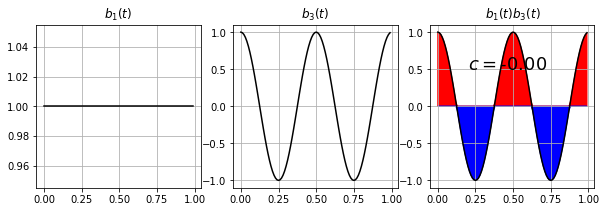

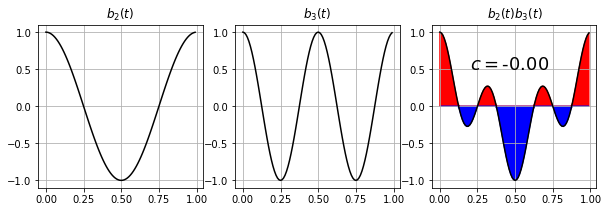

In [149]:
# ortogonalita spoj. bazi 
t = np.arange(0,1,0.01)
b1 = np.ones(t.shape)
b2 = np.cos(2*np.pi*t); 
b3 = np.cos(4*np.pi*t); 
c12 = np.dot(b1,b2) * 0.01
c13 = np.dot(b1,b3) * 0.01
c23= np.dot(b2,b3) * 0.01

#--- 12
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].plot(t,b1,color='k') 
ax[0].set_title('$b_1(t)$')
ax[0].grid()
ax[1].plot(t,b2,color='k') 
ax[1].set_title('$b_2(t)$')
ax[1].set_ylim(-1.1,1.1)
ax[1].grid()
red_blue_continuous(t, b1 * b2,ax[2])
ax[2].set_title('$b_1(t) b_2(t)$')
ax[2].text(0.2,0.5,"$c =${:.2f}".format(c),fontsize = 18)
ax[2].grid()
plt.savefig('FIG/base_cont_orto12.pdf')
#--- 13
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].plot(t,b1,color='k') 
ax[0].set_title('$b_1(t)$')
ax[0].grid()
ax[1].plot(t,b3,color='k') 
ax[1].set_title('$b_3(t)$')
ax[1].set_ylim(-1.1,1.1)
ax[1].grid()
red_blue_continuous(t, b1 * b3,ax[2])
ax[2].set_title('$b_1(t) b_3(t)$')
ax[2].text(0.2,0.5,"$c =${:.2f}".format(c),fontsize = 18)
ax[2].grid()
plt.savefig('FIG/base_cont_orto13.pdf')
#--- 23
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].plot(t,b2,color='k') 
ax[0].set_title('$b_2(t)$')
ax[0].grid()
ax[1].plot(t,b3,color='k') 
ax[1].set_title('$b_3(t)$')
ax[1].set_ylim(-1.1,1.1)
ax[1].grid()
red_blue_continuous(t, b2 * b3,ax[2])
ax[2].set_title('$b_2(t) b_3(t)$')
ax[2].text(0.2,0.5,"$c =${:.2f}".format(c),fontsize = 18)
ax[2].grid()
plt.savefig('FIG/base_cont_orto23.pdf')

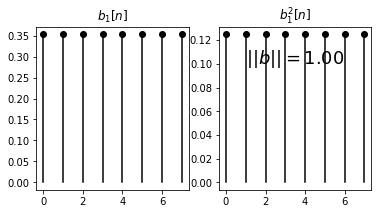

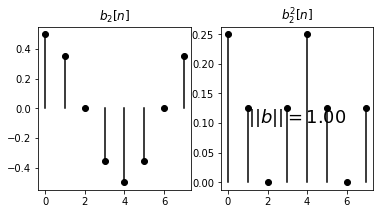

In [167]:
# normalita 8-d bazi
n = np.arange(0,8)
b1 = np.ones(n.shape) * np.sqrt(1/8); 
c1 = np.sqrt(np.sum(np.power(b1,2)))
b2 = 1/2 * np.cos (2*np.pi*1/8 * n)
c2 = np.sqrt(np.sum(np.power(b2,2)))
_, ax = plt.subplots(1,2, figsize=(6,3))
ax[0].stem(n,b1,basefmt=" ",linefmt='k',markerfmt='ko')  # nechci cervenou baseline ...
ax[0].set_title('$b_1[n]$')
ax[1].set_title('$b_1^2[n]$')
ax[1].text(1,0.1,"$||b|| =${:.2f}".format(c1),fontsize = 18)
ax[1].stem(n,np.power(b1,2),basefmt=" ",linefmt='k',markerfmt='ko')  # nechci cervenou baseline ...
plt.savefig('FIG/base8_norm1.pdf')
#---
_, ax = plt.subplots(1,2, figsize=(6,3))
ax[0].stem(n,b2,basefmt=" ",linefmt='k',markerfmt='ko')  # nechci cervenou baseline ...
ax[0].set_title('$b_2[n]$')
ax[1].set_title('$b_2^2[n]$')
ax[1].text(1,0.1,"$||b|| =${:.2f}".format(c2),fontsize = 18)
ax[1].stem(n,np.power(b2,2),basefmt=" ",linefmt='k',markerfmt='ko')  # nechci cervenou baseline ...
plt.savefig('FIG/base8_norm2.pdf')

In [170]:
# norma spojitych bazi 
t = np.arange(0,1,0.01)
b1 = np.ones(t.shape)
b2 = np.cos(2*np.pi*t); 
b3 = np.cos(4*np.pi*t); 
c1 = np.sqrt(np.sum(np.power(b1,2))*0.01)
c2 = np.sqrt(np.sum(np.power(b2,2))*0.01)
c3 = np.sqrt(np.sum(np.power(b3,2))*0.01)
print (c1, c2, c3)

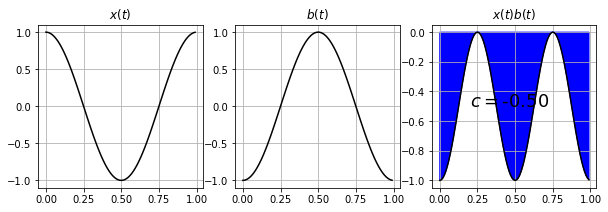

In [174]:
# jeste spojite baze - cosinusovka a minus cosinusovka -----------------
t = np.arange(0,1,0.01)
x = np.cos(2*np.pi*t); 
b = -x
c = np.dot(b,x) * 0.01
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].plot(t,x,color='k') 
ax[0].set_title('$x(t)$')
ax[0].grid()
ax[1].plot(t,b,color='k') 
ax[1].set_title('$b(t)$')
ax[1].grid()
red_blue_continuous(t, b * x,ax[2])
ax[2].set_title('$x(t) b(t)$')
ax[2].text(0.2,-0.5,"$c =${:.2f}".format(c),fontsize = 18)
ax[2].grid()
plt.savefig('FIG/cos_minus_cos.pdf')

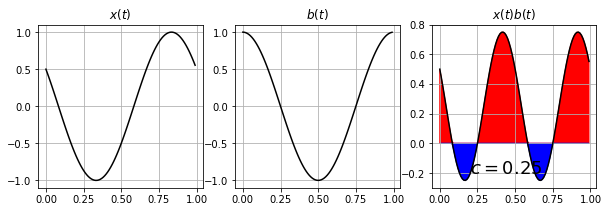

In [192]:
# posunuta cosinusovka a  cosinusovka -----------------
t = np.arange(0,1,0.01)
x = np.cos(2*np.pi*t+np.pi/3); 
b = np.cos(2*np.pi*t); 
c = np.dot(b,x) * 0.01
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].plot(t,x,color='k') 
ax[0].set_title('$x(t)$')
ax[0].grid()
ax[1].plot(t,b,color='k') 
ax[1].set_title('$b(t)$')
ax[1].grid()
red_blue_continuous(t, b * x,ax[2])
ax[2].set_title('$x(t) b(t)$')
ax[2].text(0.2,-0.2,"$c =${:.2f}".format(c),fontsize = 18)
ax[2].grid()
plt.savefig('FIG/poscos_cos.pdf')

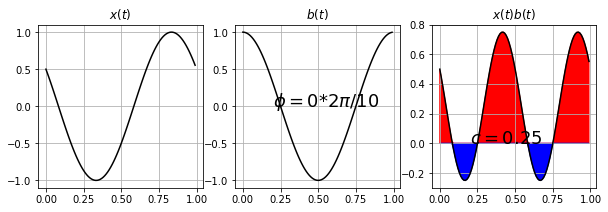

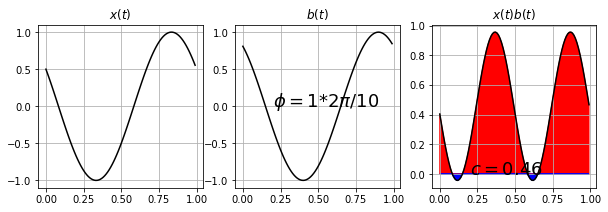

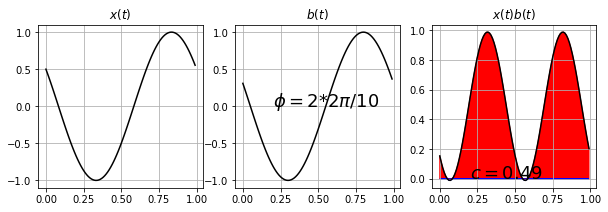

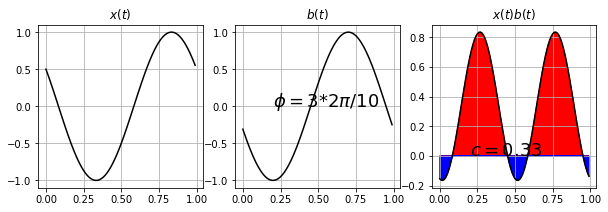

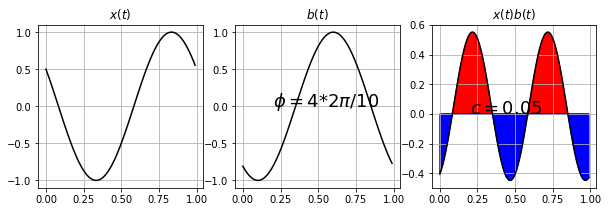

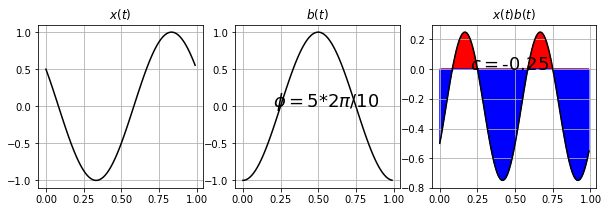

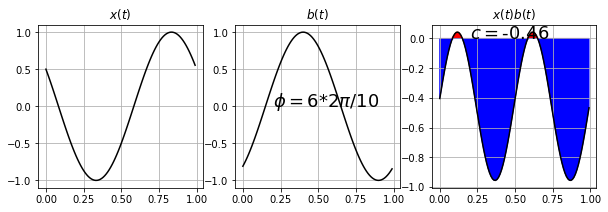

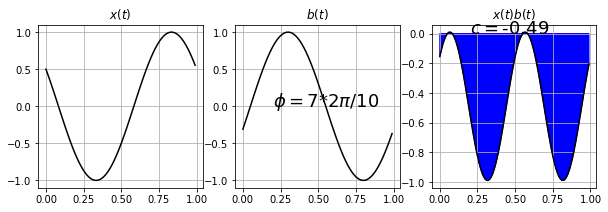

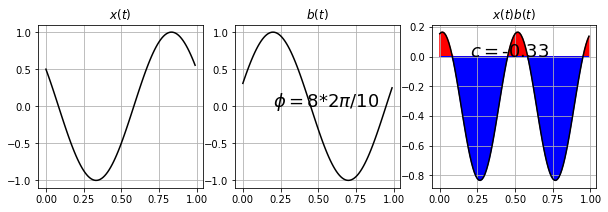

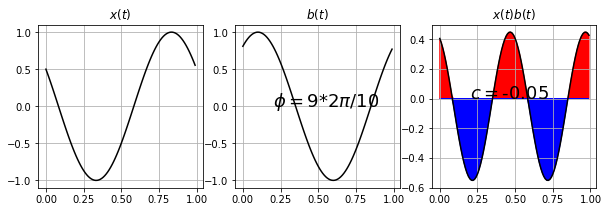

In [191]:
# mega tvorba ruzne posunutych cosinusovek 
t = np.arange(0,1,0.01)
x = np.cos(2*np.pi*t+np.pi/3); 
k = np.arange(10)
phi = 2*np.pi / 10 * k
for n,phii in zip(k,phi):
    b = np.cos(2*np.pi*t + phii); 
    c = np.dot(b,x) * 0.01
    _, ax = plt.subplots(1,3, figsize=(10,3))
    ax[0].plot(t,x,color='k') 
    ax[0].set_title('$x(t)$')
    ax[0].grid()
    ax[1].plot(t,b,color='k') 
    ax[1].set_title('$b(t)$')
    ax[1].grid()
    ax[1].text(0.2,0.0,"$\phi =${:d}*$2\pi/10$".format(n),fontsize = 18)
    red_blue_continuous(t, b * x,ax[2])
    ax[2].set_title('$x(t) b(t)$')
    ax[2].text(0.2,0.0,"$c =${:.2f}".format(c),fontsize = 18)
    ax[2].grid()
    plt.savefig('FIG/poscos_cos_'+str(n)+'.pdf')

0.5 -0.3333333333333333


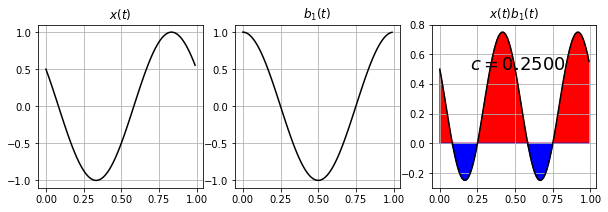

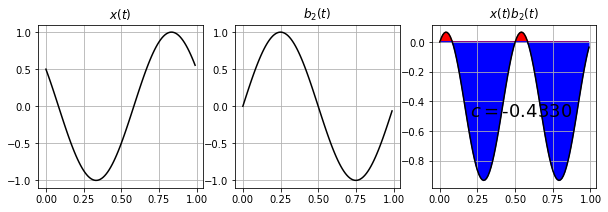

In [199]:
# --------------- cosinusovka a sinusovka  -----------------
t = np.arange(0,1,0.01)
x = np.cos(2*np.pi*t+np.pi/3); 
b1 = np.cos(2*np.pi*t)
b2 = np.sin(2*np.pi*t)
            
c1 = np.dot(b1,x) * 0.01
c2 = np.dot(b2,x) * 0.01
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].plot(t,x,color='k') 
ax[0].set_title('$x(t)$')
ax[0].grid()
ax[1].plot(t,b1,color='k') 
ax[1].set_title('$b_1(t)$')
ax[1].grid()
red_blue_continuous(t, b1 * x,ax[2])
ax[2].set_title('$x(t) b_1(t)$')
ax[2].text(0.2,0.5,"$c =${:.4f}".format(c1),fontsize = 18)
ax[2].grid()
plt.savefig('FIG/cos_cos_podruhe.pdf')
#---
_, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].plot(t,x,color='k') 
ax[0].set_title('$x(t)$')
ax[0].grid()
ax[1].plot(t,b2,color='k') 
ax[1].set_title('$b_2(t)$')
ax[1].grid()
red_blue_continuous(t, b2 * x,ax[2])
ax[2].set_title('$x(t) b_2(t)$')
ax[2].text(0.2,-0.5,"$c =${:.4f}".format(c2),fontsize = 18)
ax[2].grid()
plt.savefig('FIG/cos_sin.pdf')
c = c1 + 1j*c2
print(np.abs(c), np.angle(c) / np.pi)

(0.25000000000000006+0.4330127018922193j) 0.5 0.3333333333333333


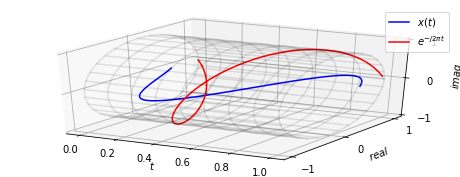

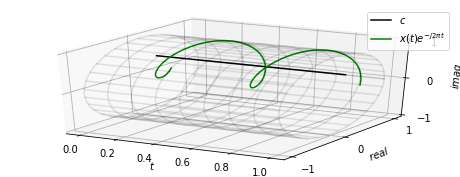

In [224]:
# cosinusovka promitnuta do kompl. exponencialy
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d

# funkce pro komplexni drateny barel 
def complex_cylinder(t1, t2, r, fig):
    '''kresli sedy drateny valec ve 3d tak, aby byla dobre videt komplexni exponenciala. 
    t1 je pocatecni cas
    t2 je koncovy cas 
    r je polomer
    fig je obrazek'''
    phi = np.linspace(0,2 * np.pi,100)
    t = np.linspace(t1,t2,9)
    kolo = r * np.exp(1j * phi)
    for tt in t: 
        fig.plot3D(tt * np.ones(phi.shape), np.real(kolo), np.imag(kolo),color='k',alpha=0.1)
    phi = np.linspace(0,2 * np.pi,32)
    kolo = r * np.exp(1j * phi)
    for z in kolo:        
        line=art3d.Line3D(*zip((t1,np.real(z),np.imag(z)), (t2,np.real(z),np.imag(z))), markevery=(1, 1), color='k',alpha=0.1)
        ax.add_line(line)   
       
t = np.arange(0,1,0.01)
x = np.cos(2*np.pi*t+np.pi/3); 
b = np.exp(-1j*2*np.pi*t)
plt.figure(figsize=(8,3))
ax = plt.axes(projection="3d")
ax.plot3D(t, np.real(x), np.zeros(t.shape),color='b',label='$x(t)$')
ax.plot3D(t, np.real(b), np.imag(b),color='r',label='$e^{-j2 \pi t}$')
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel('$real$')
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_zlabel('$imag$')
complex_cylinder(0,1,1,ax)
plt.savefig('FIG/cos_cexp.pdf')
# --- 
y = x * b
c = np.sum(y) * 0.01
print(c, np.abs(c), np.angle(c)/np.pi)
plt.figure(figsize=(8,3))
ax = plt.axes(projection="3d")
ax.plot3D(t, np.real(c)*np.ones(t.shape), np.imag(c)*np.ones(t.shape),color='k',label='$c$')
ax.plot3D(t, np.real(y),np.imag(y),color='g',label='$x(t) e^{-j2 \pi t}$')
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel('$real$')
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_zlabel('$imag$')
complex_cylinder(0,1,1,ax)
plt.savefig('FIG/cos_cexp_nasobeno.pdf')

In [225]:
x = 3
b = 1/np.sqrt(2) + 1j/np.sqrt(2)
c = x * np.conj(b)
c 
c * b 

(2.9999999999999996+0j)

0.5000000000000001 0.3333333333333333 0.5000000000000001 -0.3333333333333333


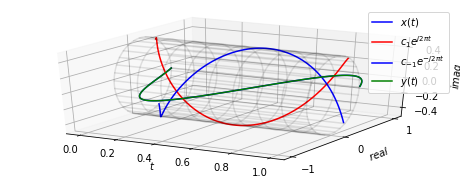

In [233]:
# soucet dvou komplexnich exp do cosinusovky. 
t = np.arange(0,1,0.01)
x = np.cos(2*np.pi*t+np.pi/3); 
b1 = np.exp(1j*2*np.pi*t)
c1 = np.dot(x, np.conj(b1)) * 0.01   # conjug needed ! 
bm1 = np.exp(-1j*2*np.pi*t)
cm1 = np.dot(x, np.conj(bm1)) * 0.01 # conjug needed ! 
print (np.abs(c1), np.angle(c1)/np.pi, np.abs(cm1), np.angle(cm1)/np.pi)

plt.figure(figsize=(8,3))
# synthetizing the comples exponentials 
y1 = c1 * b1
ym1 = cm1 * bm1
# and summing them ... 
y = y1 + ym1

ax = plt.axes(projection="3d")
ax.plot3D(t, np.real(x), np.zeros(t.shape),color='b',label='$x(t)$')
ax.plot3D(t, np.real(y1), np.imag(y1),color='r',label='$c_1 e^{j2 \pi t}$')
ax.plot3D(t, np.real(ym1), np.imag(ym1),color='b',label='$c_{-1} e^{-j2 \pi t}$')
ax.plot3D(t, np.real(y), np.zeros(t.shape),color='g',label='$y(t)$')

ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel('$real$')
ax.set_yticks([-1, 0, 1])
#ax.set_zticks([-1, 0, 1])
ax.set_zlabel('$imag$')
complex_cylinder(0,1,0.5,ax)
plt.savefig('FIG/2exp_to_cos.pdf')
